In [18]:
from sqlalchemy import create_engine, select, func, desc, text, label
from gorillatracker.ssl_pipeline.models import TrackingFrameFeature, Tracking, Video
from sqlalchemy.orm import sessionmaker

from tabulate import tabulate

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

import pandas as pd
import numpy as np

engine = create_engine("sqlite:///test.db")
session_cls = sessionmaker(bind=engine)

stmt = (
    select(Video.camera_id, func.sum(Video.frames).label("count"))
    .group_by(Video.camera_id)
    .order_by(desc("count"))
    )

with session_cls() as session:
    result = session.execute(stmt)
    print(tabulate(result.fetchall(), headers=result.keys(), tablefmt="psql"))

+-------------+---------+
|   camera_id |   count |
|-------------+---------|
|           6 |   53445 |
|          25 |   33390 |
|          36 |   32670 |
|          11 |   29580 |
|           4 |   24480 |
|           8 |   19470 |
|          12 |   15990 |
|          14 |   12450 |
|           3 |   12150 |
|          30 |   11670 |
|          29 |   11430 |
|          21 |   11370 |
|          31 |    5805 |
|          32 |    5445 |
+-------------+---------+


In [3]:
stmt = text("select * from tracking_frame_feature")

with session_cls() as session:
    result = session.execute(stmt)
    print(tabulate(result.fetchall()[:100], headers=result.keys(), tablefmt="psql"))

+-----------------------------+------------+---------------+------------+-----------------+-----------------+--------------+---------------+--------------+--------+
|   tracking_frame_feature_id |   video_id |   tracking_id |   frame_nr |   bbox_x_center |   bbox_y_center |   bbox_width |   bbox_height |   confidence | type   |
|-----------------------------+------------+---------------+------------+-----------------+-----------------+--------------+---------------+--------------+--------|
|                           1 |         84 |             1 |          0 |        0.347656 |        0.396615 |     0.192188 |      0.453993 |     0.967285 | body   |
|                           2 |         84 |             1 |          6 |        0.349689 |        0.398421 |     0.190153 |      0.455198 |     0.96875  | body   |
|                           3 |         84 |             1 |         12 |        0.351414 |        0.398395 |     0.188277 |      0.452836 |     0.966797 | body   |
|         

+------------+---------+
|   video_id |   count |
|------------+---------|
|        106 |    5032 |
|         99 |    4526 |
|        117 |    4081 |
|        116 |    3885 |
|        114 |    3689 |
|        105 |    3608 |
|        102 |    2968 |
|        115 |    2515 |
|        110 |    2299 |
|        100 |    1845 |
|        107 |    1791 |
|         97 |    1755 |
|        104 |    1665 |
|        108 |    1461 |
|        101 |    1425 |
|        118 |    1218 |
|        120 |    1202 |
|         95 |     999 |
|        119 |     972 |
|         94 |     803 |
|        112 |     694 |
|        103 |     648 |
|         88 |     567 |
|         87 |     535 |
|         98 |     430 |
|         96 |     405 |
|         90 |     396 |
|        109 |     353 |
|         85 |     315 |
|        113 |     234 |
|        111 |     194 |
|         86 |     153 |
|         92 |     112 |
|         89 |      63 |
|         81 |      63 |
|         82 |      59 |
|         83 |      12 |


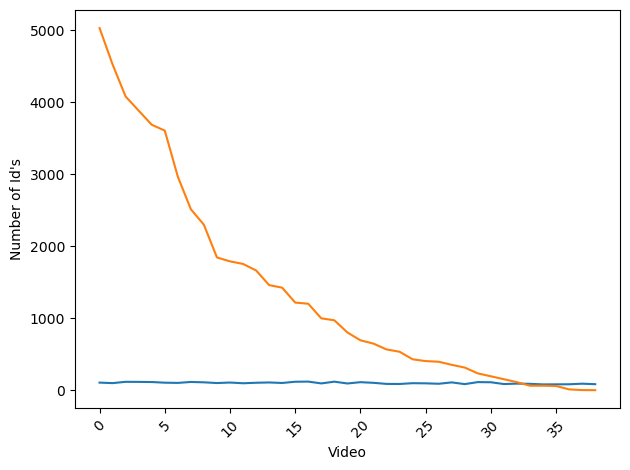

In [21]:
stmt = (
    select(Tracking.video_id, func.sum(Tracking.tracking_id).label("count"))
    .group_by(Tracking.video_id)
    .order_by(desc("count"))
    )

with session_cls() as session:
    result = session.execute(stmt)
    all = result.fetchall()
    print(tabulate(all[:100], headers=result.keys(), tablefmt="psql"))
    
plt.plot(all)
plt.xlabel("Video")
plt.ylabel("Number of Id's")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:
stmt = (
    select(Video.camera_id, func.avg(Tracking.tracking_id).label("count"))
    .join(Tracking, Video.video_id == Tracking.video_id)
    .group_by(Video.camera_id)
    .order_by(desc("count"))
    )

with session_cls() as session:
    result = session.execute(stmt)
    print(tabulate(result.fetchall()[:100], headers=result.keys(), tablefmt="psql"))

+-------------+----------+
|   camera_id |    count |
|-------------+----------|
|          12 | 235.682  |
|          25 | 234      |
|          21 | 225.789  |
|          29 | 184.947  |
|           4 | 182.537  |
|          14 | 170.565  |
|          30 | 165.333  |
|           6 | 158.707  |
|          11 | 141.395  |
|           8 | 135.2    |
|           3 | 110      |
|          32 |  98      |
|          36 |  93.1613 |
+-------------+----------+


### Datetime

+---------------------+
| start_time          |
|---------------------|
| 2022-03-24 06:27:00 |
| 2022-11-14 14:56:00 |
| 2023-01-20 14:08:00 |
| 2022-06-19 09:12:00 |
| 2022-03-23 09:14:00 |
| 2022-02-28 17:02:00 |
| 2022-03-06 11:59:00 |
| 2022-04-03 10:24:00 |
| 2022-04-28 14:45:00 |
| 2022-09-12 15:56:00 |
| 2022-12-13 15:22:00 |
| 2022-05-29 09:35:00 |
| 2022-12-06 06:52:00 |
| 2022-07-06 09:11:00 |
| 2022-03-30 09:06:00 |
| 2022-10-20 09:26:00 |
| 2022-07-11 13:32:00 |
| 2022-05-20 11:03:00 |
| 2022-07-11 16:04:00 |
| 2022-02-26 11:22:00 |
| 2022-03-26 12:46:00 |
| 2022-11-14 15:19:00 |
| 2023-01-20 14:09:00 |
| 2022-06-19 09:26:00 |
| 2022-04-09 13:51:00 |
| 2022-03-01 06:50:00 |
| 2022-03-06 12:10:00 |
| 2022-04-03 10:48:00 |
| 2022-05-04 14:51:00 |
| 2022-09-25 09:31:00 |
| 2023-01-03 11:32:00 |
| 2022-06-19 09:15:00 |
| 2022-12-23 12:18:00 |
| 2022-07-09 11:22:00 |
| 2022-04-03 13:24:00 |
| 2022-11-11 14:18:00 |
| 2022-07-15 09:13:00 |
| 2022-05-20 11:15:00 |
| 2022-07-11 16:

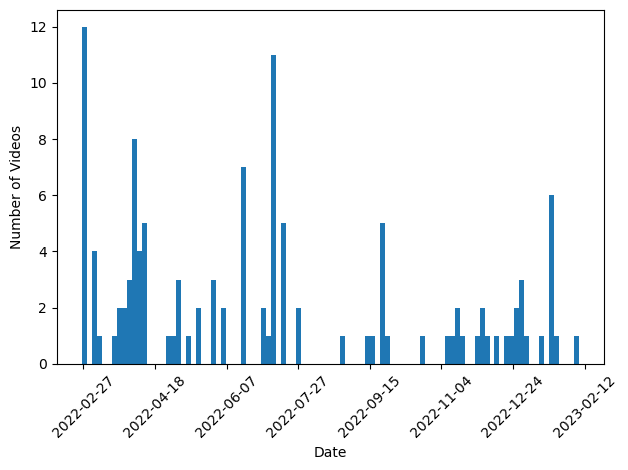

In [6]:
with session_cls() as session:
    result = session.execute(select(Video.start_time))
    all = result.fetchall()
    print(tabulate(all, headers=result.keys(), tablefmt="psql"))
    
all_dates = [mdates.date2num(date[0].date()) for date in all]

fig, ax = plt.subplots()
ax.hist(all_dates, bins=100)
ax.xaxis.set_major_formatter(DateFormatter("%Y-%m-%d"))
# plt.yscale("log")
plt.xlabel("Date")
plt.ylabel("Number of Videos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


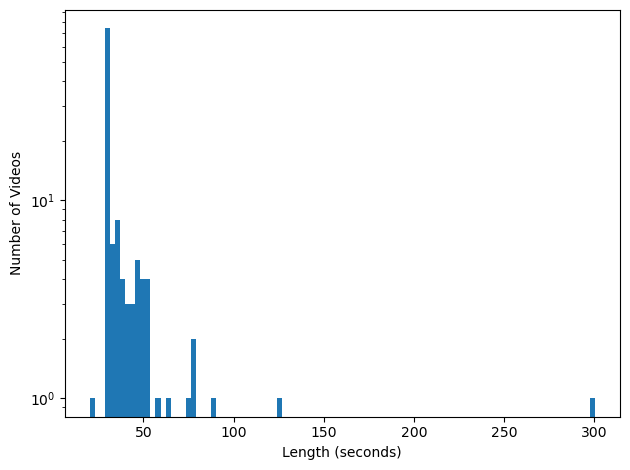

In [17]:
stmt = (
    select((Video.frames / Video.fps).label("duration"))
    )

with session_cls() as session:
    result = session.execute(stmt)
    all = result.scalars().all()

fig, ax = plt.subplots()
ax.hist(all, bins=100)
plt.yscale("log")
plt.xlabel("Length (seconds)")
plt.ylabel("Number of Videos")
plt.tight_layout()
plt.show()